# 머신러닝

##### (1)  시각화 포함 탐색적 자료분석을 시행하시오(EDA)

In [156]:
import pandas as pd
import numpy as np
df= pd.read_csv('./data1/student_data.csv')
df

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
0,GP,F,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,5,6
1,GP,F,no,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,5
2,GP,F,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,7,8
3,GP,F,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15,15,14
4,GP,F,yes,no,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,yes,no,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9,9,9
391,MS,M,no,no,2.0,4.0,5.0,3.0,4.0,2.0,3.0,15,14,16
392,MS,M,no,no,5.0,5.0,3.0,3.0,3.0,3.0,3.0,8,10,8
393,MS,M,no,no,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11,11,12


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel      394 non-null    float64
 5   freetime    393 non-null    float64
 6   goout       392 non-null    float64
 7   Dalc        391 non-null    float64
 8   Walc        393 non-null    float64
 9   health      391 non-null    float64
 10  absences    392 non-null    float64
 11  grade       395 non-null    int64  
 12  G1          395 non-null    int64  
 13  G2          395 non-null    int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 43.3+ KB


학생 성적 평균:  10.660759493670886


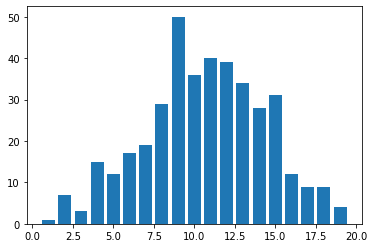

In [158]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.bar(df['grade'].value_counts().index,df['grade'].value_counts().values)
print('학생 성적 평균: ', df['grade'].mean())
plt.show()


In [159]:
import scipy.stats as stats
stats.shapiro(df['grade'])
# 종속변수 학생 성적 분포 확인 결과 정규분포 형태를 띄었고, shapiro test 결과 p-value가 0.05보다 작으므로 정규성을 띄지 않는다고 판단
# 추후 모델링 과정 전 정규화 스케일링 진행

ShapiroResult(statistic=0.9871256351470947, pvalue=0.0014306077500805259)

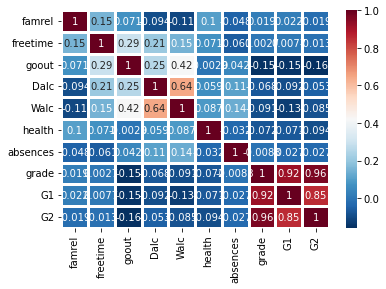

In [160]:
import seaborn as sns

df_cor = df.corr(method = 'pearson')
sns.heatmap(df_cor,
           xticklabels = df_cor.columns,
           yticklabels = df_cor.columns,
            cmap = 'RdBu_r',
           annot=True,
           linewidth=3)
plt.show()

In [161]:
df.select_dtypes(include=['object']).columns.to_list()

['school', 'sex', 'paid', 'activities']

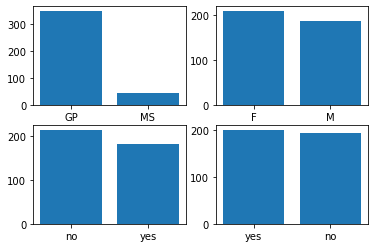

In [162]:
# 범주형 변수 시각화
fig, axs = plt.subplots(2,2)
axs[0][0].bar(df['school'].value_counts().index,df['school'].value_counts().values)
axs[0][1].bar(df['sex'].value_counts().index,df['sex'].value_counts().values)
axs[1][0].bar(df['paid'].value_counts().index,df['paid'].value_counts().values)
axs[1][1].bar(df['activities'].value_counts().index,df['activities'].value_counts().values)
plt.show()

#### (2) 결측치를 식별: 예측하는 두 가지 방법을 쓰고, 이를 선택한 이유를 설명하시오.

In [163]:
display(df[df.isna().any(axis=1)])
print(df[df.isna().any(axis=1)].shape)
# 결측치는 14개이고 한 행이 모두 결측치인 경우는 없다.

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
9,GP,M,yes,yes,5.0,5.0,NaN,1.0,1.0,5.0,0.0,15,14,15
14,GP,M,no,no,NaN,5.0,2.0,1.0,1.0,3.0,0.0,15,14,16
15,GP,F,no,no,4.0,4.0,4.0,1.0,2.0,2.0,NaN,14,14,14
25,GP,F,yes,no,1.0,2.0,2.0,1.0,NaN,5.0,14.0,8,6,9
39,GP,F,yes,yes,4.0,3.0,1.0,1.0,1.0,NaN,8.0,13,14,13
40,GP,F,no,yes,3.0,3.0,NaN,1.0,2.0,3.0,25.0,9,7,10
49,GP,F,no,yes,4.0,4.0,4.0,1.0,1.0,NaN,2.0,7,7,7
61,GP,F,no,yes,5.0,5.0,5.0,NaN,5.0,5.0,6.0,10,10,8
71,GP,M,no,no,3.0,3.0,3.0,NaN,1.0,3.0,0.0,10,10,10
82,GP,F,yes,no,4.0,4.0,4.0,1.0,1.0,5.0,NaN,6,7,6


(18, 14)


In [164]:
# 결측지 대체 방법
# 1) 단순 대치법: 수치형 변수의 경우 각 컬럼의 평균값이나, 중앙값으로, 명목형, 범주형 변수의 경우 최반값으로 대체
# 2) Knn을 이용한 결측치 대체: 보간법 중 결측치가 없는 컬럼들의 최근접 이웃 알고리즘을 통해 결측치 대체(수치형 변수만 가능)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel      394 non-null    float64
 5   freetime    393 non-null    float64
 6   goout       392 non-null    float64
 7   Dalc        391 non-null    float64
 8   Walc        393 non-null    float64
 9   health      391 non-null    float64
 10  absences    392 non-null    float64
 11  grade       395 non-null    int64  
 12  G1          395 non-null    int64  
 13  G2          395 non-null    int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 43.3+ KB


In [166]:
df.isna().sum()
# 결측치가 있는 열은 famrel, freetime, goaut, Dalc, Walc, health, absences(모두 수치형 변수)

school        0
sex           0
paid          0
activities    0
famrel        1
freetime      2
goout         3
Dalc          4
Walc          2
health        4
absences      3
grade         0
G1            0
G2            0
dtype: int64

In [167]:
### knn 기법을 사용해 결측치 대체 (이유: 모두 수치형 변수이기 때문에)
from sklearn.impute import KNNImputer

# 수치형 데이터만을 추출
KNN_data= df.drop(columns=['school','sex','paid','activities'])

# 모델링
imputer = KNNImputer()
df_filled = imputer.fit_transform(KNN_data)
df_filled = pd.DataFrame(df_filed, columns=KNN_data.columns)
df[KNN_data.columns] = df_filled

df.isna().sum()

school        0
sex           0
paid          0
activities    0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
grade         0
G1            0
G2            0
dtype: int64

#### (3) 범주형 변수 인코딩이  필요한 경우를 식별하고, 변환을 적용하시오, 이를 선택한 이유를 설명하시오.


In [168]:
df = pd.get_dummies(data =df, columns=['school','sex','paid','activities'],drop_first=True)
df.info()
# school, sex, paid, activities 변수가 boolean타입이므로 원핫인코딩을 진행
# 나머지 변수의 경우 수치형 변수이므로 변환하지 않음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   famrel          395 non-null    float64
 1   freetime        395 non-null    float64
 2   goout           395 non-null    float64
 3   Dalc            395 non-null    float64
 4   Walc            395 non-null    float64
 5   health          395 non-null    float64
 6   absences        395 non-null    float64
 7   grade           395 non-null    float64
 8   G1              395 non-null    float64
 9   G2              395 non-null    float64
 10  school_MS       395 non-null    uint8  
 11  sex_M           395 non-null    uint8  
 12  paid_yes        395 non-null    uint8  
 13  activities_yes  395 non-null    uint8  
dtypes: float64(10), uint8(4)
memory usage: 32.5 KB


#### (4) 데이터 분할 방법을 2가지 쓰고 적절한 데이터 분할을 적용하시오 , 이를 선택한 이유를 설명하시오.

In [169]:
# 1) 랜덤 분할: 분할 시에 무작위로 사용자가 지정한 비율로 분할한다. 
# 2) 층화 추출 기법: 종수변수가 범주형 변수인 경우 종속변수의 클래스의 비율을 기준으로 학습용 데이터와 테스트용 데이터의 비율을 동일하게 분할
# 해당 데이터의 경우 종속변수가 연속형이므로 단순 랜덤 샘플링 진행
from sklearn.model_selection import train_test_split

X = df.drop('grade',axis=1)
y = df['grade']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2022)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(276, 13) (276,)
(119, 13) (119,)


#### (5) svm, xgboost, randomforest 3개의 알고리즘 공통점을 쓰고 학생성적 예측 분석에 적합한 알고리즘인지 설명하시오.

- 회귀분석과 분류분석을 모두 할 수 있는 분석 알고리즘이다.
- 모두 범주형 변수를 독립변수로 사용할 수 없어 변환을 해주어야 한다.
- 과대 적합 과소 적합을 피하기 위한 매개변수의 설정이 필요하다.
- 회귀분석에서 다중공선성의 문제를 해결할 수 있다.
- 해당 데이터에서는 종속변수의 값이 연속형이므로 회귀분석이 적합하다. svm은 커널트릭, xboost와 randomforest는 트리모델을 통해 다중공선성을 해결할 수 있다. 그러므로 회귀분석을 지원하는 3가지 알고리즘은 연속형 변수를 예측하기 적합하다.

In [170]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [171]:
svr = SVR()

param_grid={'C':[0.1,1,10,1000],
            'gamma':[0.001,0.01,0.1,1,10]}

grid_svr=GridSearchCV(svr, param_grid=param_grid,cv=5)
grid_svr.fit(X_train_scaled,y_train)
print('final params', grid_svr.best_params_)   # 최적의 파라미터 값 출력
print('best score', grid_svr.best_score_)      # 최고의 점수
print('R2: ',grid_svr.score(X_test_scaled,y_test))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,grid_svr.predict(X_test_scaled))))

final params {'C': 1000, 'gamma': 0.001}
best score 0.9601741564461677
R2:  0.9559422285028001
RMSE:  0.7886055617677804


In [172]:
rf = RandomForestRegressor()

param_grid={'max_depth':[2,4,6,8,10],
            'min_samples_split':[2,4,6,8,10]}

grid_rf=GridSearchCV(rf, param_grid=param_grid,cv=5)
grid_rf.fit(X_train_scaled,y_train)
print('final params', grid_rf.best_params_)   # 최적의 파라미터 값 출력
print('best score', grid_rf.best_score_)      # 최고의 점수
print('R2: ',grid_rf.score(X_test_scaled,y_test))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,grid_rf.predict(X_test_scaled))))

final params {'max_depth': 8, 'min_samples_split': 6}
best score 0.9637016338748122
R2:  0.9549663210036783
RMSE:  0.7972917798592373


In [173]:
xgb = XGBRegressor(n_estimators=1000)

param_grid = [{'max_depth':[2,4,6,8,10]}]

grid_xgb = GridSearchCV(xgb, param_grid=param_grid, cv=5)
grid_xgb.fit(X_train_scaled,y_train)
print('final params', grid_xgb.best_params_)   # 최적의 파라미터 값 출력
print('best score', grid_xgb.best_score_)      # 최고의 점수
print('R2: ',grid_xgb.score(X_test_scaled,y_test))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,grid_xgb.predict(X_test_scaled))))

final params {'max_depth': 6}
best score 0.9587319957787497
R2:  0.9565388277899283
RMSE:  0.7832479925107609


In [176]:
xgb = XGBRegressor(n_estimators=1000, max_depth=6)
xgb.fit(X_train_scaled,y_train)
print('RMSE: ',np.sqrt(mean_squared_error(y_test,xgb.predict(X_test_scaled))))

RMSE:  0.7832479925107609


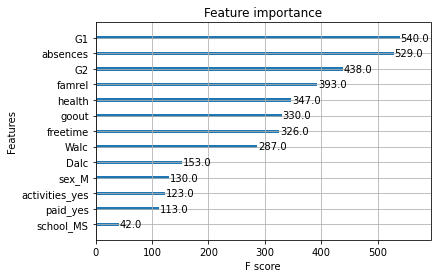

In [179]:
from xgboost import plot_importance
plot_importance(xgb)
plt.show()

# 통계분석

### 1. 회귀분석

#### (1) 데이터를 8:2로 분할하고 선형회귀를 적용하시오. 결졍계수와 rmse를 구하시오

In [3]:
#!pip install mglearn

In [27]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
# 데이터셋 불러오기
from sklearn import datasets
X, y = datasets.fetch_openml('boston', return_X_y=True)
X.drop(columns=['CHAS','RAD'],inplace=True)
# 훈련,테스트 셋 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

## R2
print("선형 회귀 결정계수: ", lr.score(X_test,y_test))
print('선형 회귀 RMSE: ', np.sqrt(mean_squared_error(y_test,lr.predict(X_test))))

선형 회귀 결정계수:  0.5481751941198661
선형 회귀 RMSE:  6.065590546044544


#### (2) 데이터를 8:2로 분할하고 릿지 회귀를 적용하시오. alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을 때 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산하시오

In [ ]:
xgb = XGBRegressor(n_estimators=1000)

param_grid = [{'max_depth':[2,4,6,8,10]}]

grid_xgb = GridSearchCV(xgb, param_grid=param_grid, cv=5)
grid_xgb.fit(X_train_scaled,y_train)
print('final params', grid_xgb.best_params_)   # 최적의 파라미터 값 출력
print('best score', grid_xgb.best_score_)      # 최고의 점수
print('R2: ',grid_xgb.score(X_test_scaled,y_test))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,grid_xgb.predict(X_test_scaled))))

In [33]:
ridge = Ridge()
param_grid = {'alpha':np.arange(0,1.1,0.1)}

grid_ridge = GridSearchCV(ridge, param_grid)
grid_ridge.fit(X_train,y_train)

print('best params: ',grid_ridge.best_params_)
print('릿지 회귀 결정계수: ', grid_ridge.score(X_test,y_test))
print('릿지 회귀 rmse: ', np.sqrt(mean_squared_error(y_test,grid_ridge.predict(X_test))))

best params:  {'alpha': 0.0}
릿지 회귀 결정계수:  0.5481751941198667
릿지 회귀 rmse:  6.06559054604454


#### (3) 데이터를 8:2로 분할하고 릿지 회귀를 적용하시오. alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을 때 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산하시오


In [34]:
lasso = Lasso()
param_grid = {'alpha':np.arange(0,1.1,0.1)}

grid_lasso = GridSearchCV(lasso, param_grid)
grid_lasso.fit(X_train,y_train)

print('best params: ',grid_lasso.best_params_)
print('릿지 회귀 결정계수: ', grid_lasso.score(X_test,y_test))
print('릿지 회귀 rmse: ', np.sqrt(mean_squared_error(y_test,grid_lasso.predict(X_test))))

best params:  {'alpha': 0.0}
릿지 회귀 결정계수:  0.548175194119866
릿지 회귀 rmse:  6.065590546044545


### 2. 다항 회귀분석 시각화

#### 아래와 같은 단순 선형 회귀를 다항 회귀로 3차까지 적용시켜 계수를 구하고 3차항을 적용한 모델의 스캐터 플롯과 기울기 선을 그시오.

In [38]:
import pandas as pd
import numpy as np

m=100
X=6 * np.random.rand(m,1)-3
y = 3 * X**3 + X**2 + 2*X + 2 + np.random.randn(m,1) # 노이즈 포함
line = np.linspace(-3,3,100, endpoint=False).reshape(-1,1)

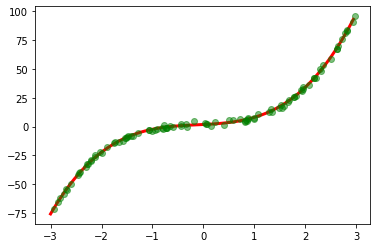

In [41]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

## x**3 까지 3차항을 적용시켜야 함
poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
line_poly = poly.transform(line)
reg = LinearRegression().fit(X_poly,y)

plt.plot(line, reg.predict(line_poly),c='r',linewidth=3)
plt.plot(X,y,'o',c='g',alpha=0.5)

## 3. ANOVA분석
#### 변수 3개(하나는 범주형 변수/ 나머지 두 개는 수치형 연속변수)의 이원분산분석을 수행하고 통계표를 작성하시오

In [45]:
import pandas as pd
import numpy as np

avocado = pd.read_csv('./data1/avocado.csv')
avocado = avocado[['AveragePrice','type','region']]
avocado = avocado[(avocado['region']=='Orlando')|(avocado['region']=='Boston')|(avocado['region']=='Chicago')].reset_index(drop=True)
avocado

,AveragePrice,type,region
0,1.13,conventional,Boston
1,1.07,conventional,Boston
2,1.01,conventional,Boston
3,1.02,conventional,Boston
4,1.19,conventional,Boston
...,...,...,...
1009,1.36,organic,Orlando
1010,1.67,organic,Orlando
1011,1.53,organic,Orlando
1012,1.55,organic,Orlando


In [46]:
## 1. 상호작용효과 가설 검정
# 귀무가설: region과 avocado type 간에는 상호작용 효과가 없다,
# 대립가설: region과 avocado type 간에는 상호작용 효과가 있다.
## 2. 주효과 검정에 대한 가설
# 귀무가설 1: region 종류에 다른 AveragePrice 차이는 존재하지 않는다.
# 대립가설 1: region 종류에 따른 AveragePrice 차이는 존재한다.
# 귀무가설 2: avocado type 종류에 다른 AveragePrice 차이는 존재하지 않는다.
# 대립가설 2: type 종류에 따른 AveragePrice 차이는 존재한다.

In [48]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = 'AveragePrice ~ C(type)+C(region)+C(type):C(region)'
model = ols(formula,avocado).fit()
aov_table = anova_lm(model,typ=2)
aov_table
# 상호작용에 대한 검정 결과 p-value가 유의수준 0.05 보다 작으므로 귀무가설을 기각한다. 즉, 상호작용 효과가 있다.
# 주효과 검정 결과도 모두 p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각한다. 즉, 각 변수에 따른 AveragePrice의 차이가 있다.

,sum_sq,df,F,PR(>F)
C(type),56.111007,1.0,828.218296,1.989417e-133
C(region),0.432136,2.0,3.189242,4.161918e-02
C(type):C(region),1.878817,2.0,13.866003,1.146622e-06
Residual,68.291047,1008.0,NaN,NaN


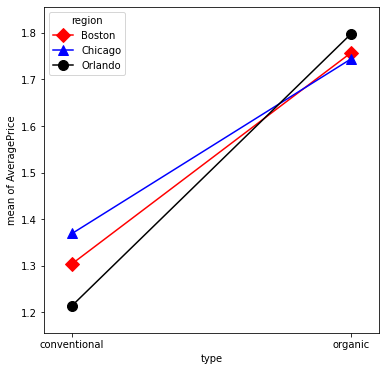

In [56]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
### 독립변수와 종속변수 모두 시리즈 형식을 변경
avocado_type = avocado['type']
region = avocado['region']
AveragePrice=avocado['AveragePrice']

fig,ax = plt.subplots(figsize=(6,6))
fig = interaction_plot(avocado_type, region, AveragePrice, colors=['red','blue','black'], markers=['D','^','o'],ms=10,ax=ax)

# 상호작용 효과와 각 변수별 차이가 확실히 나타남을 알수 있다. 특히 Orlando에서는 다른 지역보다 conventional보다 organic의 AveragePrice가 높다.